In [0]:
#@title Helper Functions

import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [0]:
%matplotlib inline

import numpy as np
import torch

import matplotlib.pyplot as plt

## MNIST Dataset

MNIST dataset consists of greyscale handwritten digits. Each image is 28x28 pixels.

![](https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3a95d118f9df5a86826e1791c5c100817f0fd924/intro-to-pytorch/assets/mnist.png)

## Download the MNIST dataset

In [0]:
from torchvision import datasets, transforms

# Pre-processing
# Define a transform to normalize the data
# normalize with mean 0.5, std 0.5 for each channel เกลี่ยสีให้ทุกรูปใกล้เคียงกัน ดำ 0 ขาว 1
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

# a pair of image, label
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 8709674.64it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 141780.70it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2313304.34it/s]                           
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 53140.98it/s]            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
for images, labels in trainloader:
  print(images[0].shape)
  print(labels[0])
  break

torch.Size([1, 28, 28])
tensor(1)


In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
# Python iter()

num_list = [1, 2, 3, 4, 5]
num_list_iter = iter(num_list)
print(next(num_list_iter))
print(next(num_list_iter))

1
2


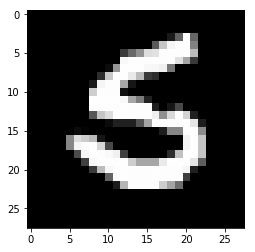

In [0]:
# Greys_r r is reverse
# https://gist.github.com/endolith/2719900
# (1, 28, 28) squeeze >> (28, 28)

# plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')
plt.imshow(images[1].numpy()[0, :, :], cmap='Greys_r')

In [0]:
def activation(x):
    return 1/(1+torch.exp(-x))

**Exercise:** Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [0]:
images.shape

torch.Size([64, 1, 28, 28])

In [0]:
# Flatten the input images
# images.shape[0] << batch size, 64
# 64 แถวเป็นรูปภาพ
# -1 หมายถึงให้แปลงแต่ละรูปเป็น 1-d array
inputs = images.view(images.shape[0], -1)
print(inputs.shape)

torch.Size([64, 784])


In [0]:
# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [0]:
out.shape

torch.Size([64, 10])

Outputs are equally distributed because we haven't train out network yet.
![](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/assets/image_distribution.png?raw=true)

In [0]:
def softmax(x):
    # dim=1 sum across the columns (64)
    # torch.exp(x) << (64, 10)
    # torch.sum(torch.exp(x), dim=1) << (64,64)
    # torch.sum(torch.exp(x), dim=1).view(-1, 1) << (64, 1)
    softmax_numerator = torch.exp(x)
    print('softmax numerator shape: ', softmax_numerator.shape)
    
    print('softmax denominator before reshape: ', torch.sum(torch.exp(x), dim=1).shape)
    softmax_denominator = torch.sum(torch.exp(x), dim=1).view(-1, 1)
    print('softmax denominator after reshape: ', softmax_denominator.shape)
    
    return softmax_numerator / softmax_denominator

In [0]:
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

softmax numerator shape:  torch.Size([64, 10])
softmax denominator before reshape:  torch.Size([64])
softmax denominator after reshape:  torch.Size([64, 1])
torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Let's use nn module in PyTorch to create a network

In [0]:
from torch import nn
import torch.nn.functional as F

In [0]:
class Network(nn.Module):
    def __init__(self):
        # Call constructor of nn.Module class
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        # y = weight * feature + bias
        # https://pytorch.org/docs/stable/nn.html#linear
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        # Compute softmax by column (for each class (10))
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [0]:
model = Network()
print(model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)


Other activation functions

![](https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/assets/activation.png)

**Exercise:** Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

![](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/assets/mlp_mnist.png?raw=true)

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

In [0]:
model = Network()
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
print(model.fc1.weight[0][0])
print(model.fc1.bias[0])

print(model.fc1.weight.shape)
print(model.fc1.bias.shape)

tensor(0.0047, grad_fn=<SelectBackward>)
tensor(0.0318, grad_fn=<SelectBackward>)
torch.Size([128, 784])
torch.Size([128])


In [0]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
# sample from random normal with standard dev = 0.01
# std น้อยกระจายน้อย 
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0137,  0.0008,  0.0021,  ...,  0.0006, -0.0059, -0.0021],
        [-0.0169,  0.0100,  0.0085,  ...,  0.0031, -0.0036,  0.0030],
        [ 0.0049,  0.0054, -0.0028,  ..., -0.0082, -0.0026,  0.0051],
        ...,
        [-0.0125,  0.0011, -0.0130,  ...,  0.0041, -0.0081,  0.0056],
        [ 0.0027, -0.0021,  0.0045,  ...,  0.0086, -0.0117,  0.0168],
        [-0.0141,  0.0128,  0.0111,  ...,  0.0030, -0.0079, -0.0188]])

## Forward pass

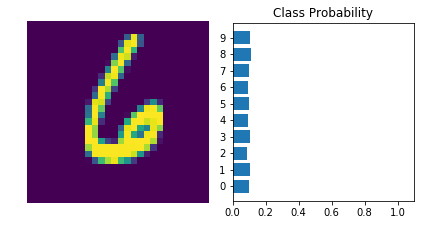

In [0]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
results = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), results)

## Using nn.Sequential

In [0]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


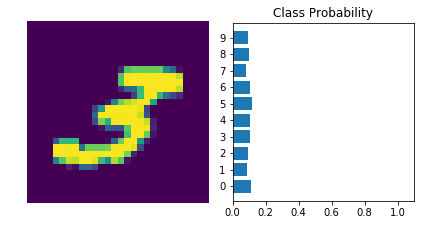

In [0]:
# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
results = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), results)

In [0]:
print(model[0])
print(model[0].weight)

Linear(in_features=784, out_features=128, bias=True)
Parameter containing:
tensor([[ 0.0028, -0.0263,  0.0106,  ..., -0.0024, -0.0216, -0.0081],
        [ 0.0312,  0.0113, -0.0052,  ..., -0.0152, -0.0239,  0.0023],
        [ 0.0333,  0.0202, -0.0065,  ...,  0.0177, -0.0321,  0.0128],
        ...,
        [ 0.0304, -0.0099, -0.0336,  ...,  0.0336, -0.0223, -0.0318],
        [ 0.0265, -0.0240, -0.0137,  ..., -0.0092,  0.0114, -0.0105],
        [ 0.0224,  0.0025, -0.0118,  ...,  0.0152, -0.0033, -0.0215]],
       requires_grad=True)
